
# Data preprocessing


Import all necessary libraries

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost


importing the dataset


In [68]:
data=pd.read_csv("traffic_volume.csv")

analyse the data

In [69]:
data.head()


,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,Memorial Day,290.00,0.0,0.0,Clear,2012-02-10 00:00:00,15:23:59,5000
1,New Years Day,291.00,0.0,0.0,Clouds,2012-02-10 00:00:00,01:45:59,5100
2,Martin Luther King Jr Day,292.00,0.0,0.0,Rain,2012-02-10 00:00:00,06:59:59,5200
3,Independence Day,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
4,New Years Eve,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516


In [70]:
data.describe()

,temp,rain,snow,traffic_volume
count,48154.000000,48205.000000,48195.000000,48207.000000
mean,281.205961,0.334257,0.000222,3259.932873
std,13.343485,44.788668,0.008168,1986.851980
min,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1193.000000
50%,282.460000,0.000000,0.000000,3380.000000
75%,291.810000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48207 entries, 0 to 48206
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48207 non-null  object 
 1   temp            48154 non-null  float64
 2   rain            48205 non-null  float64
 3   snow            48195 non-null  float64
 4   weather         48158 non-null  object 
 5   date            48207 non-null  object 
 6   Time            48207 non-null  object 
 7   traffic_volume  48207 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


Handling Missing Values

In [72]:
data.isnull().sum()


holiday            0
temp              53
rain               2
snow              12
weather           49
date               0
Time               0
traffic_volume     0
dtype: int64

In [73]:
from collections import Counter
print(Counter(data['holiday']))


Counter({'Labor Day': 4539, 'Memorial Day': 4477, 'New Years Day': 4441, 'Washingtons Birthday': 4437, 'New Years Eve': 4365, 'State Fair': 4356, 'Thanksgiving Day': 4344, 'Independence Day': 4333, 'Columbus Day': 4327, 'Veterans Day': 4322, 'Martin Luther King Jr Day': 4260, 'Christmas Day': 6})


In [79]:
print(Counter(data['weather']))

Counter({'Clouds': 15194, 'Clear': 13384, 'Mist': 5942, 'Rain': 5666, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, 'Smoke': 20, 'Squall': 4})


In [80]:
data['weather']=data['weather'].fillna('Clouds')


In [81]:
data['temp']=data['temp'].fillna(data['temp'].mean())

In [82]:
data['snow']=data['snow'].fillna(data['snow'].mean())

#Data Visualisation

In [83]:
from sklearn.preprocessing import LabelEncoder

# Step 0: Remove encoded columns if they already exist
data = data.drop(columns=[col for col in data.columns if col in ['holiday_encoded', 'weather_encoded']], errors='ignore')

# Step 1: Fill missing values
data['holiday'] = data['holiday'].fillna('nan')
data['weather'] = data['weather'].fillna('Clouds')

# Step 2: Copy and encode into original names
data_corr = data.copy()
data_corr['holiday'] = LabelEncoder().fit_transform(data_corr['holiday'])
data_corr['weather'] = LabelEncoder().fit_transform(data_corr['weather'])

# Step 3: Correlation on numeric columns
corr = data_corr.select_dtypes(include='number').corr()

# Step 4: Show correlation with traffic_volume
print(corr['traffic_volume'].sort_values(ascending=False))


traffic_volume    1.000000
temp              0.130070
rain              0.004713
holiday           0.002490
snow              0.000734
weather          -0.040035
Name: traffic_volume, dtype: float64


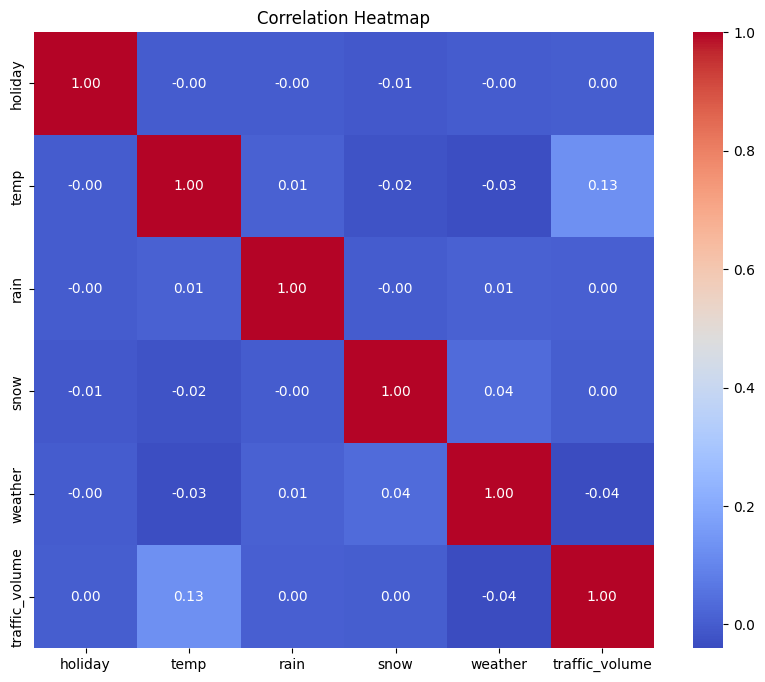

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

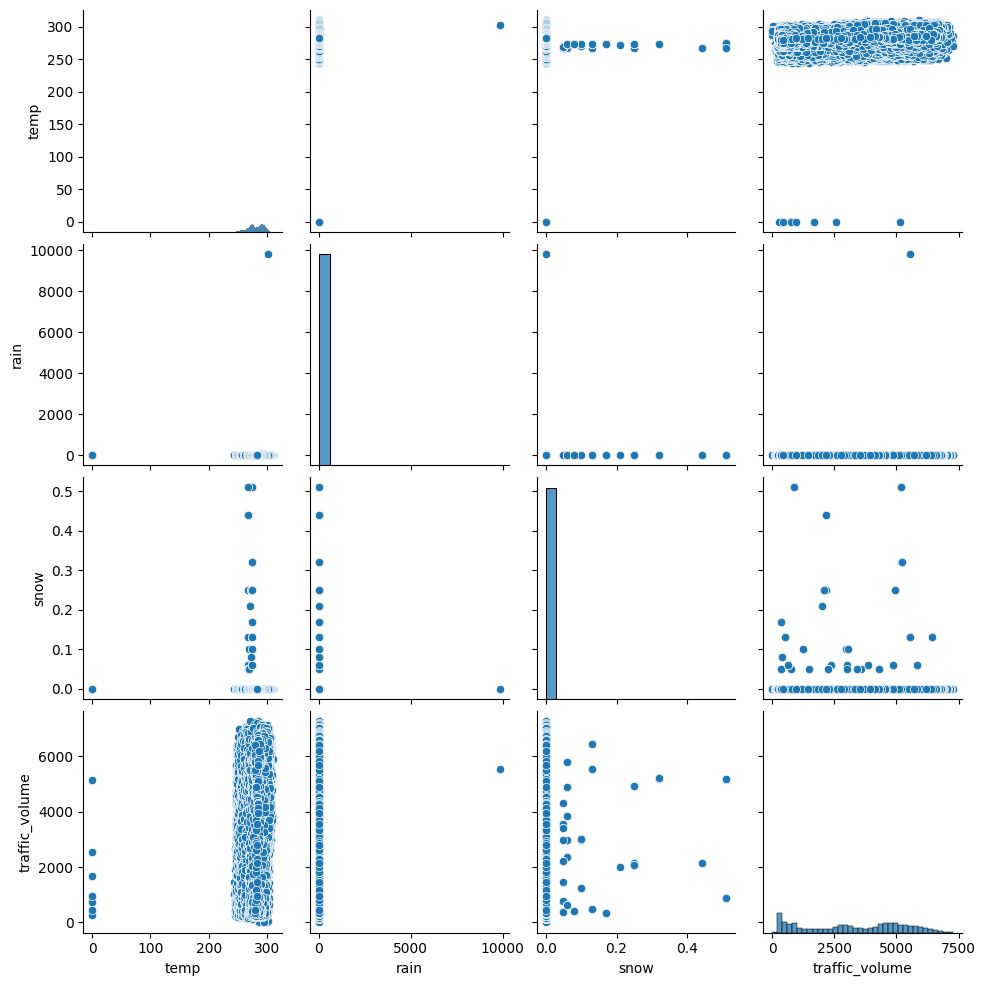

In [85]:
sns.pairplot(data)

<Axes: >

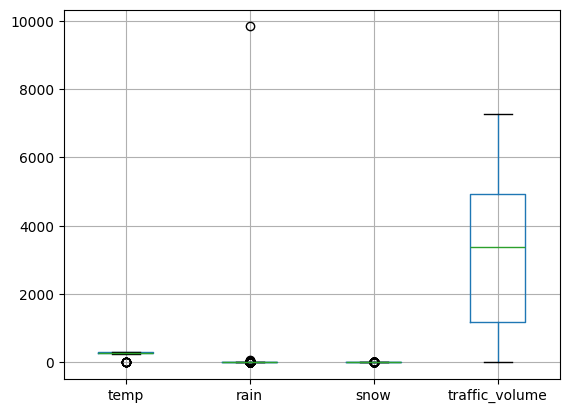

In [86]:
data.boxplot()

In [90]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


In [91]:
columns_with_outliers = ['temp', 'rain', 'snow', 'traffic_volume']

for col in columns_with_outliers:
    cap_outliers_iqr(data, col)


In [92]:
import numpy as np
data['traffic_volume_log'] = np.log1p(data['traffic_volume'])


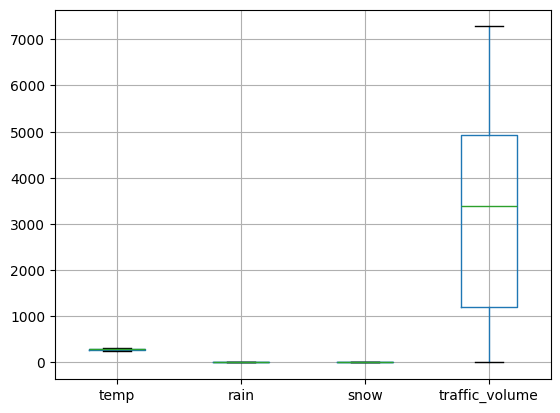

In [93]:
import matplotlib.pyplot as plt

data[columns_with_outliers].boxplot()
plt.show()


Splitting the Dataset into Dependent and Independent variable



In [94]:
y=data['traffic_volume']
x=data.drop(columns=['traffic_volume'],axis=1)


feature scaling


In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Model Building**





training and testing the model

In [96]:
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [97]:
lin_reg=linear_model.LinearRegression()
Dtree=tree.DecisionTreeRegressor()
rand=ensemble.RandomForestRegressor()
svm=svm.SVR()
xgb=xgboost.XGBRegressor()

In [98]:

print(x_train.dtypes)
print(x_train.head())


holiday                object
temp                  float64
rain                  float64
snow                  float64
weather                object
day                    object
month                  object
year                   object
hours                  object
minutes                object
seconds                object
traffic_volume_log    float64
dtype: object
                         holiday    temp  rain  snow weather day month  year  \
32829  Martin Luther King Jr Day  281.69   0.0   0.0  Clouds  19    04  2017   
7950                Memorial Day  291.86   0.0   0.0   Clear  26    07  2013   
41713                 State Fair  258.81   0.0   0.0   Clear  22    02  2018   
32999              New Years Eve  290.35   0.0   0.0   Clear  24    04  2017   
20717               Veterans Day  261.82   0.0   0.0    Mist  20    01  2016   

      hours minutes seconds  traffic_volume_log  
32829    00      00      00            6.504288  
7950     08      00      00            8.6308

In [99]:
# Check unique values
print(x_train['holiday'].unique())

# Use pandas get_dummies to encode
x_train = pd.get_dummies(x_train, columns=['holiday'])
x_test = pd.get_dummies(x_test, columns=['holiday'])

# Re-align columns of train and test if needed
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


['Martin Luther King Jr Day' 'Memorial Day' 'State Fair' 'New Years Eve'
 'Veterans Day' 'Columbus Day' 'Independence Day' 'Washingtons Birthday'
 'Labor Day' 'New Years Day' 'Thanksgiving Day' 'Christmas Day']


In [100]:
# Encoding for x_train
x_train = pd.get_dummies(x_train, columns=['weather'])

# Encoding for x_test as well
x_test = pd.get_dummies(x_test, columns=['weather'])

# Align columns of train and test to match structure
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)


In [101]:
# Convert time-related columns to numeric
time_cols = ['day', 'month', 'year', 'hours', 'minutes', 'seconds']

for col in time_cols:
    x_train[col] = pd.to_numeric(x_train[col], errors='coerce')
    x_test[col] = pd.to_numeric(x_test[col], errors='coerce')


In [102]:
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)


In [103]:
print(x_train.dtypes)


temp                                 float64
rain                                 float64
snow                                 float64
day                                    int64
month                                  int64
year                                 float64
hours                                  int64
minutes                                int64
seconds                                int64
traffic_volume_log                   float64
holiday_Christmas Day                   bool
holiday_Columbus Day                    bool
holiday_Independence Day                bool
holiday_Labor Day                       bool
holiday_Martin Luther King Jr Day       bool
holiday_Memorial Day                    bool
holiday_New Years Day                   bool
holiday_New Years Eve                   bool
holiday_State Fair                      bool
holiday_Thanksgiving Day                bool
holiday_Veterans Day                    bool
holiday_Washingtons Birthday            bool
weather_Cl

In [104]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
rand.fit(x_train,y_train)
svm.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [105]:
p1=lin_reg.predict(x_train)
p2=Dtree.predict(x_train)
p3=rand.predict(x_train)
p4=svm.predict(x_train)
p5=xgb.predict(x_train)

Model Evaluation

In [106]:
from sklearn import metrics
print(metrics.r2_score(p1,y_train))
print(metrics.r2_score(p2,y_train))
print(metrics.r2_score(p3,y_train))
print(metrics.r2_score(p4,y_train))
print(metrics.r2_score(p5,y_train))

0.8635543131945604
1.0
0.9999999933680194
-20378709.417836066
0.999984860420227


In [107]:
p1=lin_reg.predict(x_test)
p2=Dtree.predict(x_test)
p3=rand.predict(x_test)
p4=svm.predict(x_test)
p5=xgb.predict(x_test)

In [109]:
print(metrics.r2_score(y_test,p1))
print(metrics.r2_score(y_test,p2))
print(metrics.r2_score(y_test,p3))
print(metrics.r2_score(y_test,p4))
print(metrics.r2_score(y_test,p5))

0.8801415021915173
0.9999999217936144
0.9999999831833144
-0.003053948784563998
0.999974250793457


In [110]:
#random forest
MSE=metrics.mean_squared_error(y_test,p3)
np.sqrt(MSE)

0.2561455796525246

**Save the model**

In [112]:
import pickle
pickle.dump(rand,open('model.pkl','wb'))
pickle.dump(scale,open("encoder.pk1",'wb'))

In [117]:
import pandas as pd

# Load dataset
data = pd.read_csv('traffic_volume.csv')

# Separate features
X = data.drop('traffic_volume', axis=1)

# Check data types of each column
print(X.dtypes)

# Display first few rows for inspection
print(X.head())


holiday     object
temp       float64
rain       float64
snow       float64
weather     object
date        object
Time        object
dtype: object
                     holiday    temp  rain  snow weather                 date  \
0               Memorial Day  290.00   0.0   0.0   Clear  2012-02-10 00:00:00   
1              New Years Day  291.00   0.0   0.0  Clouds  2012-02-10 00:00:00   
2  Martin Luther King Jr Day  292.00   0.0   0.0    Rain  2012-02-10 00:00:00   
3           Independence Day  288.28   0.0   0.0  Clouds           02-10-2012   
4              New Years Eve  289.36   0.0   0.0  Clouds           02-10-2012   

       Time  
0  15:23:59  
1  01:45:59  
2  06:59:59  
3  09:00:00  
4  10:00:00  


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('traffic_volume.csv')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with invalid dates if any
data = data.dropna(subset=['date'])

# Extract date features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# Split Time into hours, minutes, seconds
data[['hours','minutes','seconds']] = data['Time'].str.split(':', expand=True).astype(int)

# Drop original date and Time columns
data.drop(['date','Time'], axis=1, inplace=True)

# Encode categorical features
data = pd.get_dummies(data, columns=['holiday','weather'], drop_first=True)

# Separate features and target
X = data.drop('traffic_volume', axis=1)
y = data['traffic_volume']

# Feature scaling
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Target scaling
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1)).flatten()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
score = model.score(X_test, y_test)
print(f"Model R2 Score: {score}")

# Save model and scalers
joblib.dump(model, 'model.pkl')
joblib.dump(scaler_X, 'encoder.pkl')

joblib.dump(scaler_y, 'target_scaler.pkl')

# Save column order for Flask input alignment
joblib.dump(X.columns.tolist(), 'columns.pkl')


Model R2 Score: nan


c:\Users\anjal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1285: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


['columns.pkl']